In [70]:
import pandas as pd
import numpy as np
import sys
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

np.set_printoptions(threshold=sys.maxsize) #see all elements, dont truncate

In [12]:
dFrame = pd.read_csv('compileMagnitudeClusters.csv')
quakeRecArr  = dFrame.to_records(index=False)
magXlusters = np.array(quakeRecArr.tolist()) #either a dont delete it or adaptfurther down.

In [13]:
quakeRecArr.dtype

dtype((numpy.record, [('longitde', '<f8'), ('latitude', '<f8'), ('magnitude', '<f8'), ('SOMcluster', '<i8'), ('DBSCAN cluster', '<i8'), ('KMEAN cluster', '<i8')]))

In [16]:
magXlusters[:,3]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 0.,
       0., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 0.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 0., 2., 0., 2., 2., 2., 2., 0., 2., 0., 2., 0., 2., 2.,
       0., 2., 2., 2., 2., 0., 0., 0., 2., 2., 2., 2., 2., 2., 0., 0., 3.,
       0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 1., 0., 0., 2., 0., 0., 0.,
       0., 2., 2., 3., 2., 2., 0., 0., 0., 0., 1., 0., 2., 0., 0., 1., 3.,
       1., 0., 0., 0., 0., 2., 0., 0., 3., 0., 0., 0., 0., 0., 2., 0., 0.,
       0., 2., 0., 2., 2., 0., 0., 0., 2., 0., 0., 0., 2., 0., 0., 3., 3.,
       3., 3., 2., 2., 0., 0., 0., 1., 3., 0., 0., 3., 0., 0., 0., 0., 2.,
       0., 0., 0., 0., 3., 0., 3., 0., 0., 0., 0., 0., 1., 0., 3., 3., 3.,
       3., 0., 2., 1., 1.

In [52]:
X, y = make_blobs(n_samples=3290,
                  n_features=3,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

In [90]:
cluster_labels =  magXlusters[:,3]
n_clusters = 4

silhouetteAvg = silhouette_score(X, magXlusters[:,3]) #SOM
silhouetteAvg

-0.014163001855064536

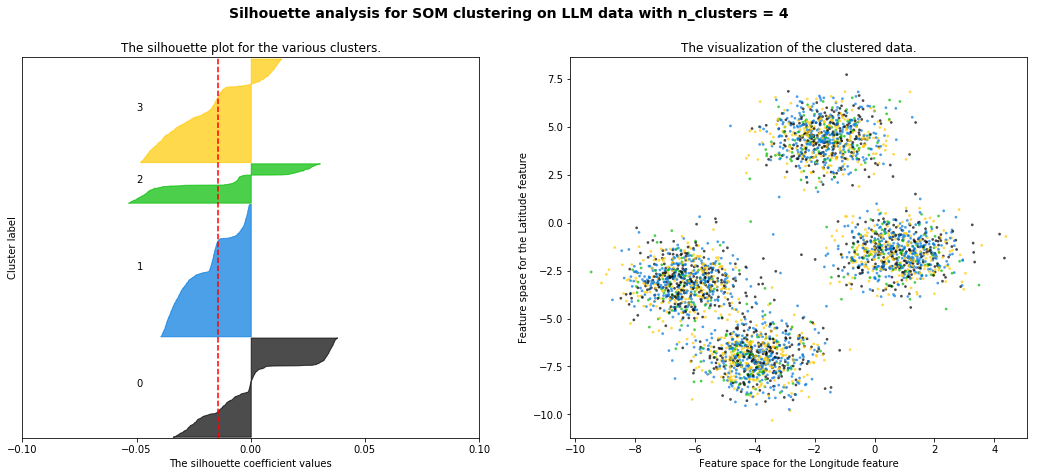

In [104]:
range_n_clusters = [4]

y_lower = 10

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1 , ax2) = plt.subplots(1 ,2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 0.1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    #cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    #print("For n_clusters =", n_clusters,
    #     "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1 , -0.05 , 0 , 0.05 , 0.1 ])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    #ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    #for i, c in enumerate(centers):
    #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the Longitude feature")
    ax2.set_ylabel("Feature space for the Latitude feature")

    plt.suptitle(("Silhouette analysis for SOM clustering on LLM data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [92]:
silhouetteAvg = silhouette_score(X, magXlusters[:,4]) #DBSCAN
silhouetteAvg

-0.09775452119718296

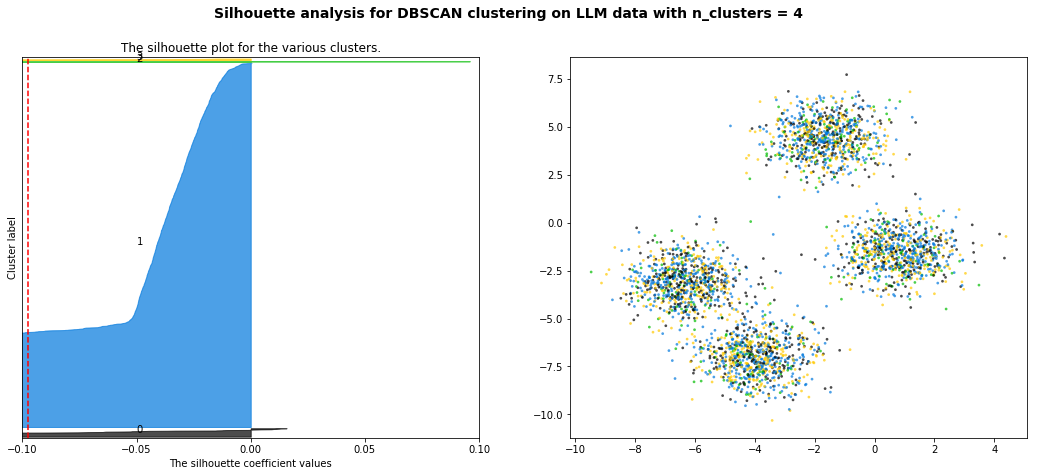

In [106]:
range_n_clusters = [4]

y_lower = 10

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1 , ax2) = plt.subplots(1 , 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 0.1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    silhouette_avg = silhouette_score(X, magXlusters[:,4])
    sample_silhouette_values = silhouette_samples(X, magXlusters[:,4])

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[magXlusters[:,4] == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # average silhouette score for all values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1 , -0.05 , 0 , 0.05 , 0.1 ])
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    plt.suptitle(("Silhouette analysis for DBSCAN clustering on LLM data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [55]:
silhouetteAvg = silhouette_score(X, magXlusters[:,5]) #KMEAN
silhouetteAvg

-0.018458478539694012

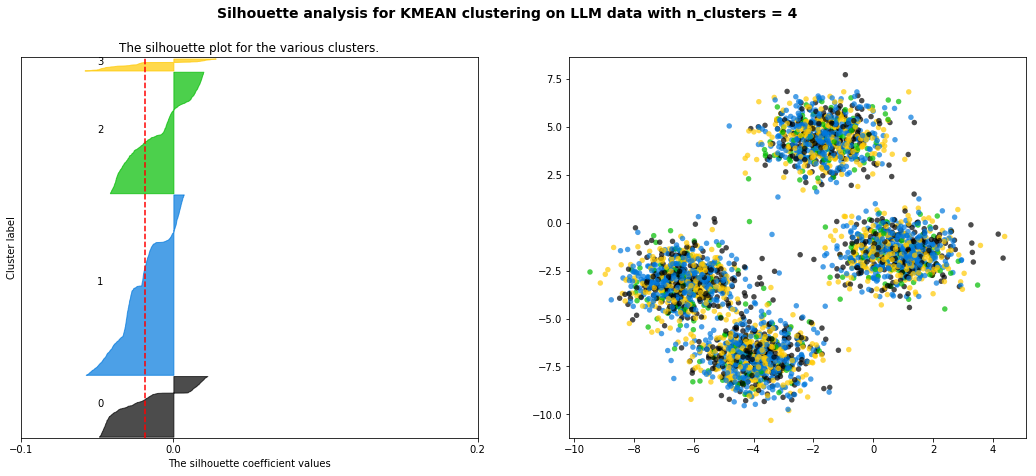

In [108]:
range_n_clusters = [4]

y_lower = 10

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1 , 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 0.1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    silhouette_avg = silhouette_score(X, magXlusters[:,5])
    sample_silhouette_values = silhouette_samples(X, magXlusters[:,5])

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[magXlusters[:,5] == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # average silhouette score for all values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2])
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='o', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    plt.suptitle(("Silhouette analysis for KMEAN clustering on LLM data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


In [ ]:
#now do for depth clustering